In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', 50)

# Read Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Mini Project/Predict Customer Clicked Ads Classification by Using Machine Learning/Clicked Ads Dataset.csv')
df.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
825,825,83.69,36,481019000.0,192.57,Perempuan,3/23/2016 5:27,No,Bandung,Jawa Barat,Otomotif
325,325,36.87,36,205790270.0,195.91,Perempuan,1/28/2016 11:50,Yes,Bandung,Jawa Barat,Fashion
659,659,76.42,26,422206330.0,223.16,Laki-Laki,4/17/2016 18:38,No,Balikpapan,Kalimantan Timur,Health
238,238,74.32,33,434420770.0,128.17,Perempuan,5/23/2016 21:14,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Finance
181,181,84.53,27,285341910.0,168.34,Perempuan,1/4/2016 21:48,Yes,Tangerang Selatan,Banten,Bank


# 1. EDA

## Descriptive Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


Kesimpulan
1. Data terdiri dari 1000 Baris dan 11 Kolom.
2. Terdapat kolom dengan isi data yang tidak memiliki informasi yang penting, yaitu kolom 'Unnamed: 0' yang merupakan kolom berisikan Index dari baris data. Kolom ini dapat kita drop saat melakukan Data Cleansing & Data Preprocessing.
3. Untuk kolom 'Male' lebih baik diubah namanya menjadi 'Gender' karena kolom tersebut berisikan data Jenis Kelamin Pelanggan, dan kolom 'Area Income' dapat diubah menjadi 'Income'.
4. Terdapat beberapa kolom memiliki data Missing Value seperti : 'Daily Time Spent on Site', 'Area Income',' Daily Internet Usage' dan 'Male'. 
5. Tipe Data untuk kolom 'Timestamp' lebih baik diubah menjadi datetime, sedangkan untuk kolom lainnya sudah sesuai.

In [4]:
# Mengubah nama kolom 'Unnamed: 0', 'Male' dan 'Area Income'
df.columns = ['Index','Daily Time Spent on Site','Age','Income','Daily Internet Usage','Gender','Timestamp','Clicked on Ad','City','Province','Category']
df.sample(5)

,Index,Daily Time Spent on Site,Age,Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,City,Province,Category
800,800,56.64,29,391894230.0,123.24,Laki-Laki,2/27/2016 8:52,Yes,Surakarta,Jawa Tengah,Bank
866,866,86.58,32,421062390.0,195.93,Laki-Laki,2/26/2016 23:44,No,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Electronic
970,970,40.18,29,355321610.0,151.96,Perempuan,6/25/2016 4:21,Yes,Surabaya,Jawa Timur,Food
380,380,80.22,30,432644170.0,224.58,Perempuan,7/5/2016 15:14,No,Bandar Lampung,Lampung,House
206,206,76.90,28,462754880.0,212.67,Perempuan,4/22/2016 8:31,No,Bekasi,Jawa Barat,Fashion


In [5]:
col = df.columns
nums = []
cats = []

for i in col :
  if df[i].dtype in ['int64','float64'] :
    nums.append(i)
  else :
    cats.append(i)
print(len(nums))
print(len(cats))

5
6


In [6]:
df[nums].describe()

,Index,Daily Time Spent on Site,Age,Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [7]:
df[nums].mean()

Index                       4.995000e+02
Daily Time Spent on Site    6.492952e+01
Age                         3.600900e+01
Income                      3.848647e+08
Daily Internet Usage        1.798636e+02
dtype: float64

In [8]:
df[cats].describe()

,Gender,Timestamp,Clicked on Ad,City,Province,Category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


Kesimpulan :
1. Untuk Data Numerik terlihat Tidak ada Perbedaan Nilai yang Signifikan antara Nilai Min/Max dengan Nilai Mean/Median dan Nilai Mean & Median memiliki nilai yang sama.
2. Data Kategorik :
  - Gender : Terdapat 2 Nilai Unik dan Data didominasi oleh Pelanggan berjenis kelamin Perempuan.
  - Timestamp : Dari 1000 data terdapat 997 Nilai Unik dengan Frekuensi Data tertinggi 2, hal ini dapat disebabkan karena penggunaan waktu Jam dan Menit yang mempengaruhi keunikan setiap data.
  - Clicked on Ad : Terdapat 2 Nilai Unik dan Data terbagi rata untuk setiap Nilai Uniknya.
  - City : Terdapat 30 Nilai Unik dengan Frekuensi data tertinggi 64.
  - Province : Terdapat 16 Nilai Unik dengan Frekuensi Data tertinggi 253.
  - Category : Terdapat 10 Nilai Unik dengan Frekuensi Data tertinggi 112.

## Univariate Analysis

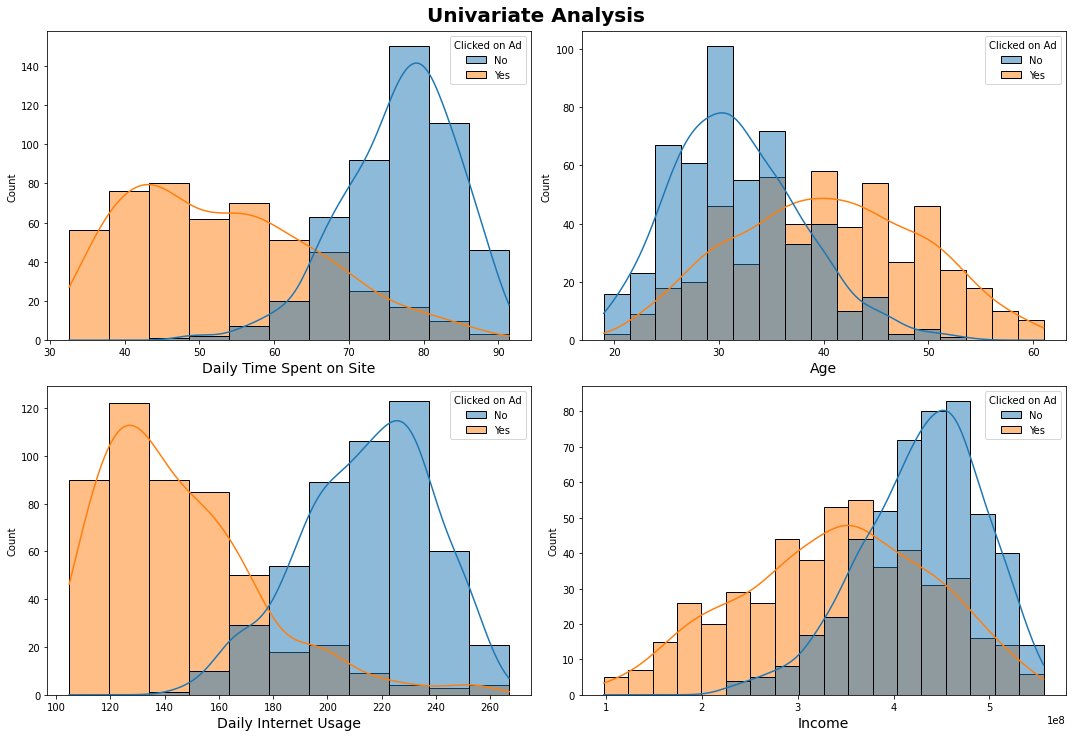

In [9]:
plt.figure(figsize=(15,10))
features = ['Daily Time Spent on Site',	'Age','Daily Internet Usage','Income']

for i in range(0,len(features)):
    plt.subplot(2,2,i+1)
    sns.histplot(x=df[features[i]], hue=df['Clicked on Ad'], kde=True)
    plt.xlabel(features[i], fontsize=14)
    plt.tight_layout()
plt.suptitle('Univariate Analysis', fontweight='bold', fontsize=20, y=1.02)
plt.savefig('Univariate Analysis', dpi = 200)
plt.tight_layout()
plt.show()

Kesimpulan :
- Daily Time Spent on Site :
  - Persebaran Data untuk Customer yang meng-klik Iklan dan yang Tidak sama - sama berbentuk Skewed Distribution.
  - Jika dilihat secara keseluruhan Kolom Daily Time Spent on Site memiliki persebaran Data Bimodal dimana persebaran data memiliki dua titik puncak.
  - Customer yang tidak meng-klik Iklan mempunyai titik puncak yang jauh lebih besar dibandingkan dengan customer yang meng-klik Iklan.
- Age :
  - Persebaran Data untuk Customer yang meng-klik Iklan dan yang Tidak sama - sama berbentuk Normal Distribution.
  - Secara keseluruhan persebaran Data Age juga memiliki bentuk Normal Distribution.
- Daily Internet Usage :
  - Persebaran Data untuk Customer yang meng-klik Iklan dan yang Tidak sama - sama berbentuk Skewed Distribution.
  - Secara keseluruhan Kolom Daily Internet Usage memiliki persebaran Data Bimodal dimana persebaran data memiliki dua titik puncak.
  - Customer yang tidak meng-klik Iklan dan customer yang meng-klik Iklan memiliki titik puncak persebaran data yang hampir sama.
- Income :
  - Persebaran Data untuk Customer yang meng-klik Iklan dan yang Tidak sama - sama berbentuk Normal Distribution.
  - Secara keseluruhan persebaran Data Income juga memiliki bentuk Normal Distribution.


## Bivariate Analysis

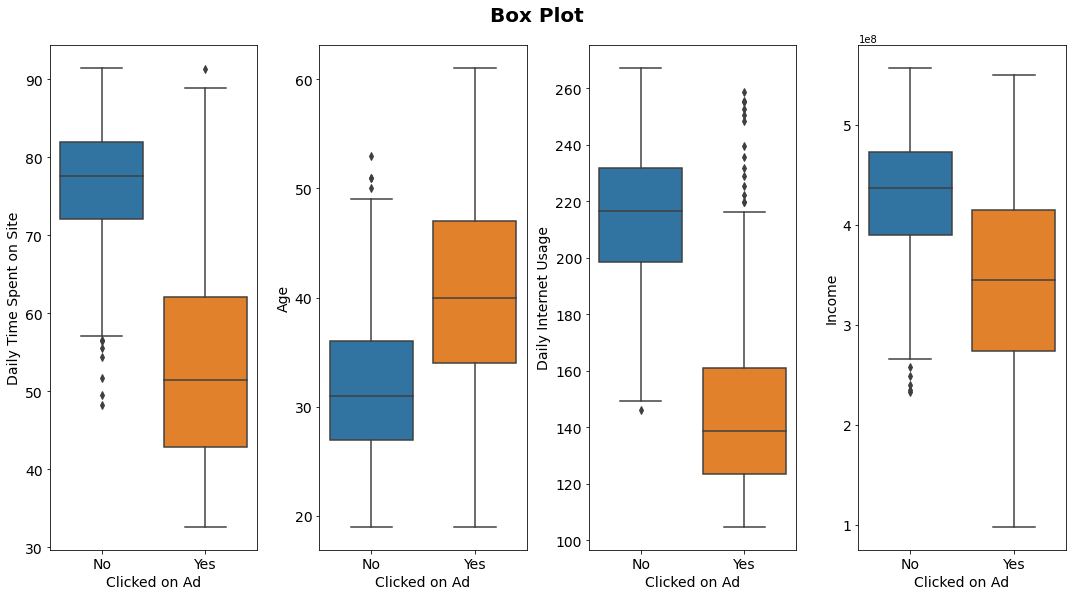

In [10]:
plt.figure(figsize=(15,8))
features = ['Daily Time Spent on Site',	'Age','Daily Internet Usage','Income']

for i in range(0,len(features)):
    plt.subplot(1,len(features),i+1)
    sns.boxplot(x=df['Clicked on Ad'], y=df[features[i]])
    plt.xlabel('Clicked on Ad', fontsize=14)
    plt.ylabel(features[i], fontsize=14)
    plt.tick_params(axis='both', which = 'major', labelsize=14)
    plt.tight_layout()
plt.suptitle('Box Plot', fontweight='bold', fontsize=20, y=1.03)
plt.savefig('Box Plot', dpi = 200)
plt.tight_layout()
plt.show()

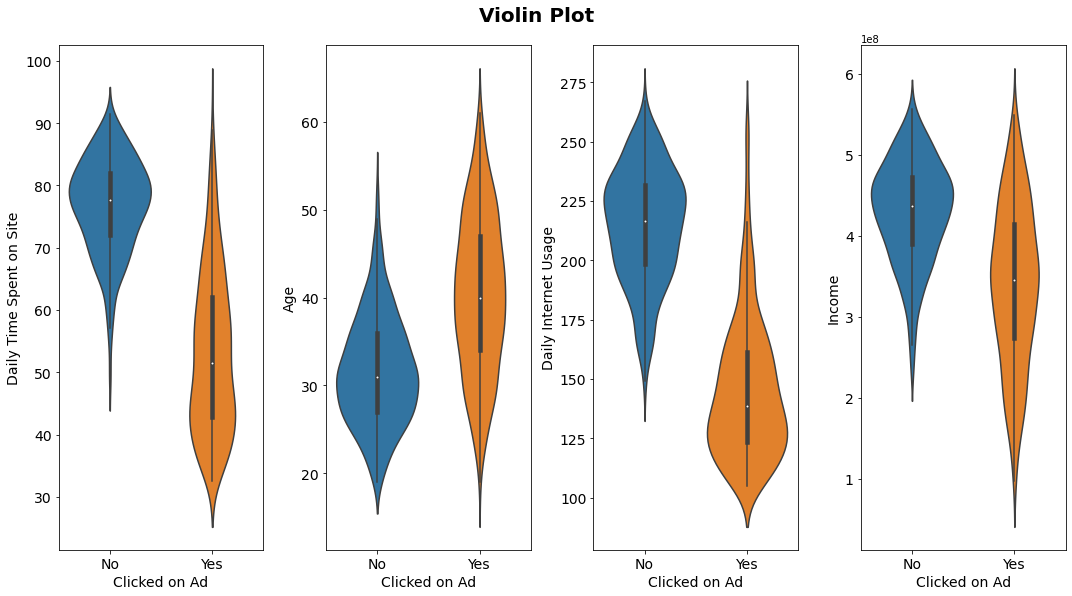

In [11]:
plt.figure(figsize=(15,8))
features = ['Daily Time Spent on Site',	'Age','Daily Internet Usage','Income']

for i in range(0,len(features)):
    plt.subplot(1,len(features),i+1)
    sns.violinplot(x=df['Clicked on Ad'], y=df[features[i]])
    plt.xlabel('Clicked on Ad', fontsize=14)
    plt.ylabel(features[i], fontsize=14)
    plt.tick_params(axis='both', which = 'major', labelsize=14)
    plt.tight_layout()
plt.suptitle('Violin Plot', fontweight='bold', fontsize=20, y=1.03)
plt.savefig('Violin Plot', dpi = 200)
plt.tight_layout()
plt.show()

Kesimpulan :
- Daily Time Spent on Site
  - Customer dengan Daily Time Spent on Site 30 - 40 lebih banyak meng-klik Iklan.
  - Customer dengan Daily Time Spent on Site 70 - 80 lebih banyak tidak meng-klik Iklan.
- Age
  - Customer dengan umur > 40 Tahun lebih banyak meng-klik Iklan.
  - Customer dengan rentang umur 20 - 30 tahun lebih banyak tidak meng-klik Iklan dibandingkan dengan rentang umur lainnya.
- Daily Internet Usage 
  - Customer dengan Daily Internet Usage 100 - 125 lebih banyak meng-klik Iklan.
  - Customer dengan Daily Internet Usage 175 - 225 lebih banyak tidak meng-klik Iklan.
- Income
  - Customer dengan rentang income sekitar 380 - 460 juta lebih banyak tidak meng-klik Iklan dibandingkan dengan rentang income lainnya.

## Multivariate Analysis

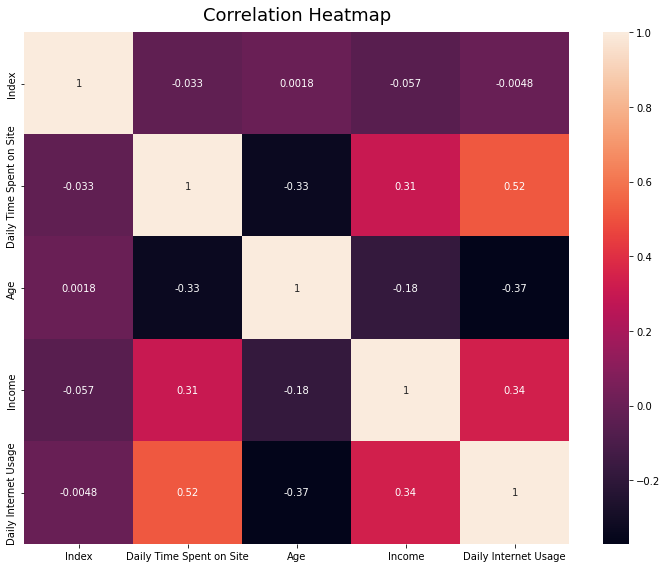

In [12]:
plt.figure(figsize=(10,8))

heatmap = sns.heatmap(df.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.tight_layout()
plt.savefig('Heatmap', dpi = 200)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


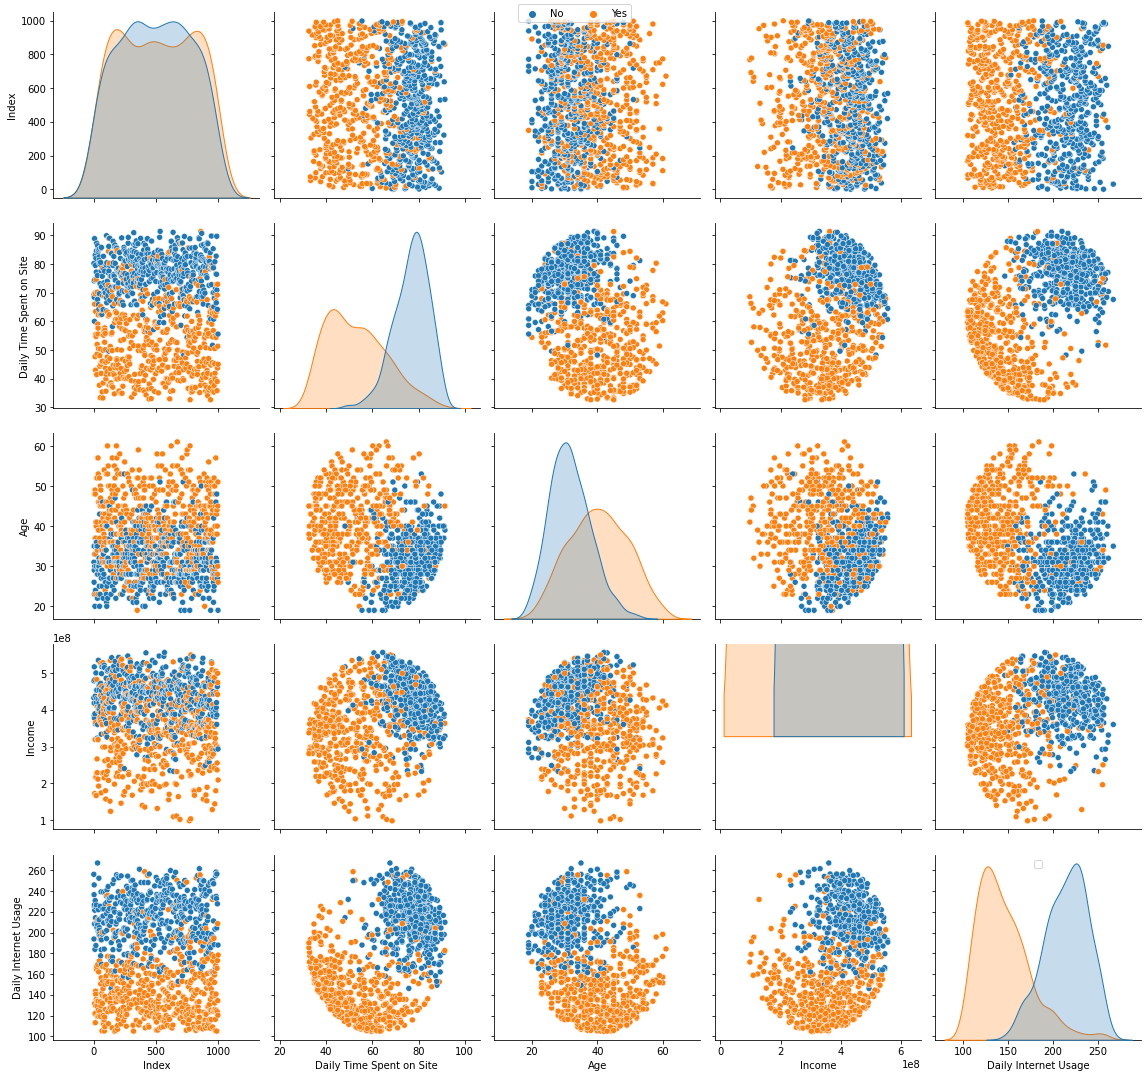

In [13]:
ax = sns.pairplot(data=df, hue='Clicked on Ad', size=3)
ax._legend.remove()
plt.legend(loc='upper center', ncol=1)
handles = ax._legend_data.values()
labels = ax._legend_data.keys()
ax.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=2)
plt.tight_layout()
plt.savefig('Pairplot', dpi = 200)

Kesimpulan :
- Untuk Kolom Daily Internet Usage dengan Kolom Daily Time Spent on Site memiliki Positive Correlation sebesar 0,52.
- Untuk Kolom Daily Internet Usage dan Kolom Daily Time Spent on Site sama - sama memiliki Low Negative Correlation dengan Kolom Age dengan masing - masing nilai sebesar -0,37 dan -0,33.
- Untuk Kolom Daily Internet Usage dan Kolom Daily Time Spent on Site sama - sama memiliki Low Positive Correlation dengan Kolom Income dengan masing - masing nilai sebesar 0,34 dan 0,31.
- Berdasarkan Gambar Pair Plot untuk Kolom Daily Internet Usage dengan Daily Time Spent on Site, customer yang meng-klik Iklan dengan yang tidak meng-klik Iklan dapat dikelompokkan dengan cukup jelas.

#2. Data Cleaning & Preprocessing

## Handling Missing Value

In [14]:
df.isnull().sum()

Index                        0
Daily Time Spent on Site    13
Age                          0
Income                      13
Daily Internet Usage        11
Gender                       3
Timestamp                    0
Clicked on Ad                0
City                         0
Province                     0
Category                     0
dtype: int64

In [15]:
df_clean = df.copy()

### Daily Time Spent on Site

In [16]:
df_clean['Daily Time Spent on Site'].fillna(df_clean['Daily Time Spent on Site'].median(), inplace=True)

### Income

In [17]:
df_clean['Income'].fillna(df_clean['Income'].median(), inplace=True)

### Daily Internet Usage

In [18]:
df_clean['Daily Internet Usage'].fillna(df_clean['Daily Internet Usage'].median(), inplace=True)

### Gender

In [19]:
df_clean['Gender'].fillna(df_clean['Gender'].mode()[0], inplace=True)

### Cek missing Value dan Persebaran Data

In [20]:
df_clean.isnull().sum()

Index                       0
Daily Time Spent on Site    0
Age                         0
Income                      0
Daily Internet Usage        0
Gender                      0
Timestamp                   0
Clicked on Ad               0
City                        0
Province                    0
Category                    0
dtype: int64

In [21]:
df_clean.describe()

,Index,Daily Time Spent on Site,Age,Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,499.500000,64.970870,36.009000,3.850493e+08,179.894270
std,288.819436,15.745394,8.785562,9.347971e+07,43.628915
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.545000,29.000000,3.298201e+08,139.017500
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.352500,42.000000,4.566932e+08,218.287500
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


Dataset sudah tidak memiliki Data Missing Value dan Nilai Rata-rata tidak mengalami perubahan yang dapat mempengaruhi pesebaran data.

## Handling Duplicated Data

In [22]:
df_clean.duplicated().sum()

0

Pada Dataset tidak terdapat Duplicated Value.

## Outliers

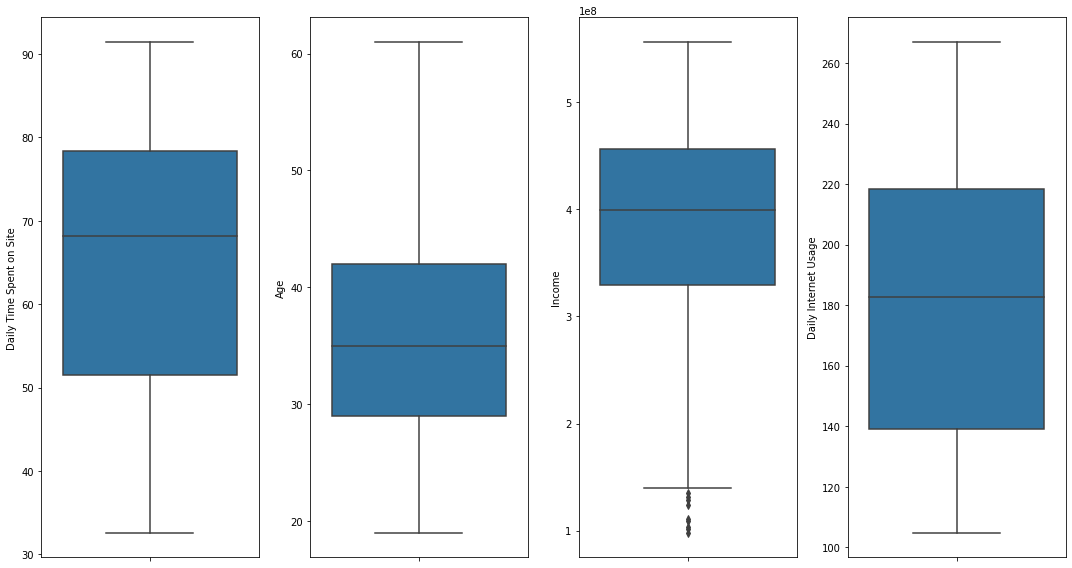

In [23]:
plt.figure(figsize=(15,8))
features=['Daily Time Spent on Site',	'Age','Income','Daily Internet Usage']

for i in range(0,len(features)):
    plt.subplot(1,len(features),i+1)
    sns.boxplot(y=df_clean[features[i]])
    plt.tight_layout()
plt.savefig('Outliers', dpi=200)

Untuk kolom 'Income' perlu dibersihkan dari Outlier.

In [24]:
# Menghapus Outlier berdasarkan IQR

Q1 = df_clean['Income'].quantile(0.25)
Q3 = df_clean['Income'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered = ((df['Income'] >= low_limit) & (df['Income'] <= high_limit))
df_clean = df_clean[filtered]

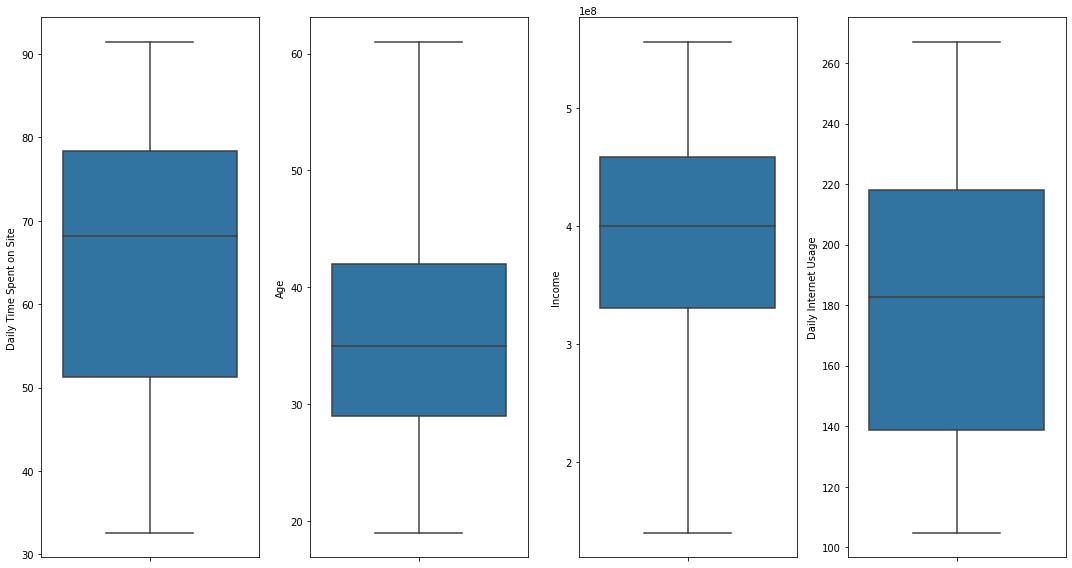

In [25]:
plt.figure(figsize=(15,8))
features=['Daily Time Spent on Site',	'Age','Income','Daily Internet Usage']

for i in range(0,len(features)):
    plt.subplot(1,len(features),i+1)
    sns.boxplot(y=df_clean[features[i]])
    plt.tight_layout()

In [26]:
print('Jumlah Data sebelum Data Cleaning :', df.shape)
print('Jumlah Data sesudah Data Cleaning :', df_clean.shape)

Jumlah Data sebelum Data Cleaning : (1000, 11)
Jumlah Data sesudah Data Cleaning : (978, 11)


## Feature Encoding

In [27]:
df_preprocessing = df_clean.copy()

In [28]:
df_preprocessing[cats].describe()

,Gender,Timestamp,Clicked on Ad,City,Province,Category
count,978,978,978,978,978,978
unique,2,975,2,30,16,10
top,Perempuan,5/30/2016 8:02,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Otomotif
freq,512,2,492,62,248,112


### City

In [29]:
city = df_preprocessing.groupby('City')['Index'].count().reset_index(name='count')
city['pct'] = round((city['count']*100)/df_preprocessing['City'].shape[0],2)
city.sort_values('pct',ascending=False)

,City,count,pct
25,Surabaya,62,6.34
2,Bandung,62,6.34
13,Jakarta Timur,62,6.34
12,Jakarta Selatan,60,6.13
10,Jakarta Barat,56,5.73
5,Bekasi,55,5.62
17,Medan,48,4.91
14,Jakarta Utara,44,4.50
23,Semarang,41,4.19
20,Palembang,40,4.09


Untuk Feature City memiliki terlalu banyak Nilai Unik dan tidak terdapat Nilai yang mendominasi. Hal tersebut dapat menyulitkan kita saat melakukan membuat Model Machine Learning karena Feature ini tidak akan memberikan informasi yang bermanfaat dalam mengklasifikasikan Customer, maka kita tidak akan menggunakan Feature City saat membuat Model Machine Learning.

### Province

In [30]:
province = df_preprocessing.groupby('Province')['Index'].count().reset_index(name='count')
province['pct'] = round((province['count']*100)/df_preprocessing['Province'].shape[0],2)
province.sort_values('pct',ascending=False)

,Province,count,pct
2,Daerah Khusus Ibukota Jakarta,248,25.36
3,Jawa Barat,205,20.96
5,Jawa Timur,88,9.00
1,Banten,71,7.26
4,Jawa Tengah,53,5.42
15,Sumatra Utara,48,4.91
14,Sumatra Selatan,40,4.09
8,Kalimantan Timur,34,3.48
9,Kepulauan Riau,33,3.37
12,Sulawesi Selatan,33,3.37


Terlihat untuk Feature Province terdapat 2 Nilai yang mendominasi yaitu Daerah Khusus Ibukota Jakarta dan Jawa Barat, maka sebelum melakukan Feature Encoding kita dapat merubah terlebih dahulu Nilai dari Feature Province menjadi 3 Nilai Unik yaitu: DKI Jakarta, Jawa Barat & Lainnya.

In [31]:
df_preprocessing['Province'] = np.where(df_preprocessing['Province']=='Daerah Khusus Ibukota Jakarta', 'DKI Jakarta',
                                        np.where(df_preprocessing['Province']=='Jawa Barat', 'Jawa Barat', 'Lainnya'))

### Category

In [32]:
category = df_preprocessing.groupby('Category')['Index'].count().reset_index(name='count')
category['pct'] = round((category['count']*100)/df_preprocessing['Category'].shape[0],2)
category.sort_values('pct',ascending=False)

,Category,count,pct
8,Otomotif,112,11.45
7,House,105,10.74
6,Health,101,10.33
4,Food,99,10.12
5,Furniture,98,10.02
1,Electronic,96,9.82
2,Fashion,96,9.82
9,Travel,94,9.61
0,Bank,89,9.10
3,Finance,88,9.00


Untuk Feature Category tidak memiliki Nilai yang mendominasi dari 10 Nilai Unik yang ada, tetapi tetap akan kita gunakan Feature ini saat membuat Model Machine Learning.

### Label Encoding

In [33]:
# Feature Gender
mapping_gender = {
    'Perempuan' : 0,
    'Laki-Laki' : 1
}
df_preprocessing['Gender'] = df_preprocessing['Gender'].map(mapping_gender)

In [34]:
# Feature Clicked on Ad
mapping_ad = {
    'No' : 0,
    'Yes' : 1
}
df_preprocessing['Clicked on Ad'] = df_preprocessing['Clicked on Ad'].map(mapping_ad)

### One-hot Encoding

In [35]:
prov = pd.get_dummies(df_preprocessing['Province'], prefix='Province')
cat = pd.get_dummies(df_preprocessing['Category'], prefix='Category')

In [36]:
df_preprocessing = df_preprocessing.join(prov)
df_preprocessing = df_preprocessing.join(cat)

In [37]:
df_preprocessing.head()

,Index,Daily Time Spent on Site,Age,Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,City,Province,Category,Province_DKI Jakarta,Province_Jawa Barat,Province_Lainnya,Category_Bank,Category_Electronic,Category_Fashion,Category_Finance,Category_Food,Category_Furniture,Category_Health,Category_House,Category_Otomotif,Category_Travel
0,0,68.95,35,432837300.0,256.09,0,3/27/2016 0:53,0,Jakarta Timur,DKI Jakarta,Furniture,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,80.23,31,479092950.0,193.77,1,4/4/2016 1:39,0,Denpasar,Lainnya,Food,0,0,1,0,0,0,0,1,0,0,0,0,0
2,2,69.47,26,418501580.0,236.50,0,3/13/2016 20:35,0,Surabaya,Lainnya,Electronic,0,0,1,0,1,0,0,0,0,0,0,0,0
3,3,74.15,29,383643260.0,245.89,1,1/10/2016 2:31,0,Batam,Lainnya,House,0,0,1,0,0,0,0,0,0,0,1,0,0
4,4,68.37,35,517229930.0,225.58,0,6/3/2016 3:36,0,Medan,Lainnya,Finance,0,0,1,0,0,0,1,0,0,0,0,0,0


### Split Dataset to Features and Target

In [38]:
X = df_preprocessing.drop(columns = ['Index','Clicked on Ad','City','Province','Category'])
y = df_preprocessing['Clicked on Ad']

In [39]:
X.head()

,Daily Time Spent on Site,Age,Income,Daily Internet Usage,Gender,Timestamp,Province_DKI Jakarta,Province_Jawa Barat,Province_Lainnya,Category_Bank,Category_Electronic,Category_Fashion,Category_Finance,Category_Food,Category_Furniture,Category_Health,Category_House,Category_Otomotif,Category_Travel
0,68.95,35,432837300.0,256.09,0,3/27/2016 0:53,1,0,0,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1,4/4/2016 1:39,0,0,1,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0,3/13/2016 20:35,0,0,1,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1,1/10/2016 2:31,0,0,1,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,0,6/3/2016 3:36,0,0,1,0,0,0,1,0,0,0,0,0,0


In [40]:
X.shape

(978, 19)

In [41]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [42]:
y.shape

(978,)

In [43]:
y.value_counts()

0    492
1    486
Name: Clicked on Ad, dtype: int64

### Feature Timestamp Extraction

In [44]:
X['Timestamp'] = pd.to_datetime(X['Timestamp'])

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  978 non-null    float64       
 1   Age                       978 non-null    int64         
 2   Income                    978 non-null    float64       
 3   Daily Internet Usage      978 non-null    float64       
 4   Gender                    978 non-null    int64         
 5   Timestamp                 978 non-null    datetime64[ns]
 6   Province_DKI Jakarta      978 non-null    uint8         
 7   Province_Jawa Barat       978 non-null    uint8         
 8   Province_Lainnya          978 non-null    uint8         
 9   Category_Bank             978 non-null    uint8         
 10  Category_Electronic       978 non-null    uint8         
 11  Category_Fashion          978 non-null    uint8         
 12  Category_Finance      

In [46]:
from datetime import date as dt

In [47]:
X['Year'] = X['Timestamp'].dt.year
X['Month_Number'] = X['Timestamp'].dt.month
X['Week_Number'] = X['Timestamp'].dt.isocalendar().week
X['Day_Number'] = X['Timestamp'].dt.day

In [48]:
X = X.drop(columns='Timestamp')

In [49]:
X['Week_Number'] = X['Week_Number'].astype('int64')

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  978 non-null    float64
 1   Age                       978 non-null    int64  
 2   Income                    978 non-null    float64
 3   Daily Internet Usage      978 non-null    float64
 4   Gender                    978 non-null    int64  
 5   Province_DKI Jakarta      978 non-null    uint8  
 6   Province_Jawa Barat       978 non-null    uint8  
 7   Province_Lainnya          978 non-null    uint8  
 8   Category_Bank             978 non-null    uint8  
 9   Category_Electronic       978 non-null    uint8  
 10  Category_Fashion          978 non-null    uint8  
 11  Category_Finance          978 non-null    uint8  
 12  Category_Food             978 non-null    uint8  
 13  Category_Furniture        978 non-null    uint8  
 14  Category_H

In [51]:
X.head()

,Daily Time Spent on Site,Age,Income,Daily Internet Usage,Gender,Province_DKI Jakarta,Province_Jawa Barat,Province_Lainnya,Category_Bank,Category_Electronic,Category_Fashion,Category_Finance,Category_Food,Category_Furniture,Category_Health,Category_House,Category_Otomotif,Category_Travel,Year,Month_Number,Week_Number,Day_Number
0,68.95,35,432837300.0,256.09,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2016,3,12,27
1,80.23,31,479092950.0,193.77,1,0,0,1,0,0,0,0,1,0,0,0,0,0,2016,4,14,4
2,69.47,26,418501580.0,236.50,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2016,3,10,13
3,74.15,29,383643260.0,245.89,1,0,0,1,0,0,0,0,0,0,0,1,0,0,2016,1,1,10
4,68.37,35,517229930.0,225.58,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2016,6,22,3


# 3. Data Modeling

## Modeling Without Data Scalling

In [52]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [53]:
from sklearn import metrics

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [55]:
X_train.shape

(684, 22)

In [56]:
X_test.shape

(294, 22)

In [57]:
models = {
    "LogisticRegression" : LogisticRegression(random_state=42),
    "DecisionTree" : DecisionTreeClassifier(random_state=42),
    "RandomForest" : RandomForestClassifier(random_state=42),
    "KNeighbors" : KNeighborsClassifier(),
    "AdaBoost" : AdaBoostClassifier(random_state=42),
    "XGB" : XGBClassifier()
}

for model_name, clf in models.items() :
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    
    print("Evaluate model: {}".format(model_name))
    
    accuracy_test = metrics.accuracy_score(y_test,y_pred)
    print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')
    precission_test = metrics.precision_score(y_test,y_pred,pos_label=1, zero_division=1)
    print("Precission Test :" + str(round(precission_test*100,2)) + '%')
    recall_test = metrics.recall_score(y_test,y_pred,pos_label=1)
    print("Recall Test :" + str(round(recall_test*100,2)) + '%')
    f1_test = metrics.f1_score(y_test,y_pred,pos_label=1)
    print("F1 Test :" + str(round(f1_test*100,2)) + '%')
    print("\n")

Evaluate model: LogisticRegression
Accuracy Test :49.32%
Precission Test :100.0%
Recall Test :0.0%
F1 Test :0.0%


Evaluate model: DecisionTree
Accuracy Test :92.18%
Precission Test :92.0%
Recall Test :92.62%
F1 Test :92.31%


Evaluate model: RandomForest
Accuracy Test :93.2%
Precission Test :92.16%
Recall Test :94.63%
F1 Test :93.38%


Evaluate model: KNeighbors
Accuracy Test :70.07%
Precission Test :73.64%
Recall Test :63.76%
F1 Test :68.35%


Evaluate model: AdaBoost
Accuracy Test :93.54%
Precission Test :92.76%
Recall Test :94.63%
F1 Test :93.69%


Evaluate model: XGB
Accuracy Test :92.86%
Precission Test :92.11%
Recall Test :93.96%
F1 Test :93.02%




In [58]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [59]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
    
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy :" + str(round(accuracy*100,2)) + '%')
precission = metrics.precision_score(y_test,y_pred,pos_label=1)
print("Precission :" + str(round(precission*100,2)) + '%')
recall = metrics.recall_score(y_test,y_pred,pos_label=1)
print("Recall :" + str(round(recall*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred,pos_label=1)
print("F1 :" + str(round(f1_test*100,2)) + '%')

Accuracy :93.2%
Precission :92.16%
Recall :94.63%
F1 :93.38%


In [60]:
performance_log = pd.DataFrame(columns=["Experiment","Recall","Accuracy","Precission","F1"])

perf = {
    "Experiment": "Random Forest Without Data Scalling",
    "Recall": str(round(recall*100,2))+'%',
    "Accuracy": str(round(accuracy*100,2))+'%',
    "Precission": str(round(precission*100,2))+'%',
    "F1": str(round(f1_test*100,2)) + '%'
}
performance_log = performance_log.append(perf, ignore_index=True)

In [61]:
performance_log

,Experiment,Recall,Accuracy,Precission,F1
0,Random Forest Without Data Scalling,94.63%,93.2%,92.16%,93.38%


## Modeling With Data Scalling

In [62]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
features = ['Daily Time Spent on Site','Age','Income','Daily Internet Usage']

for col in features :
  X_train_scaled[col] = StandardScaler().fit_transform(X_train_scaled[col].values.reshape(len(X_train_scaled), 1))
  X_test_scaled[col] = StandardScaler().fit_transform(X_test_scaled[col].values.reshape(len(X_test_scaled), 1))

In [65]:
X_train_scaled.describe()

,Daily Time Spent on Site,Age,Income,Daily Internet Usage,Gender,Province_DKI Jakarta,Province_Jawa Barat,Province_Lainnya,Category_Bank,Category_Electronic,Category_Fashion,Category_Finance,Category_Food,Category_Furniture,Category_Health,Category_House,Category_Otomotif,Category_Travel,Year,Month_Number,Week_Number,Day_Number
count,6.840000e+02,6.840000e+02,6.840000e+02,6.840000e+02,684.000000,684.00000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.0,684.000000,684.000000,684.000000
mean,-4.518802e-16,-4.168206e-16,-1.610148e-16,-1.688058e-16,0.478070,0.25000,0.217836,0.532164,0.092105,0.095029,0.092105,0.093567,0.096491,0.105263,0.105263,0.109649,0.106725,0.103801,2016.0,3.845029,15.571637,15.194444
std,1.000732e+00,1.000732e+00,1.000732e+00,1.000732e+00,0.499884,0.43333,0.413078,0.499330,0.289386,0.293470,0.289386,0.291439,0.295480,0.307117,0.307117,0.312681,0.308989,0.305226,0.0,1.926760,9.841607,8.688622
min,-2.055959e+00,-1.957570e+00,-2.781068e+00,-1.708190e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,1.000000,1.000000,1.000000
25%,-8.397445e-01,-7.972773e-01,-5.537414e-01,-9.343159e-01,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,2.000000,8.000000,8.000000
50%,1.866878e-01,-1.011015e-01,1.329822e-01,7.921602e-02,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,4.000000,15.000000,15.000000
75%,8.583449e-01,7.111035e-01,7.699151e-01,8.917866e-01,1.000000,0.25000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,5.000000,22.000000,23.000000
max,1.655681e+00,2.799631e+00,1.889041e+00,1.843959e+00,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2016.0,7.000000,53.000000,31.000000


In [66]:
X_test_scaled.describe()

,Daily Time Spent on Site,Age,Income,Daily Internet Usage,Gender,Province_DKI Jakarta,Province_Jawa Barat,Province_Lainnya,Category_Bank,Category_Electronic,Category_Fashion,Category_Finance,Category_Food,Category_Furniture,Category_Health,Category_House,Category_Otomotif,Category_Travel,Year,Month_Number,Week_Number,Day_Number
count,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.0,294.000000,294.000000,294.000000
mean,5.377407e-16,-1.450087e-16,-1.027145e-16,-4.863834e-16,0.472789,0.261905,0.190476,0.547619,0.088435,0.105442,0.112245,0.081633,0.112245,0.088435,0.098639,0.102041,0.132653,0.078231,2016.0,3.717687,14.979592,16.115646
std,1.001705e+00,1.001705e+00,1.001705e+00,1.001705e+00,0.500110,0.440421,0.393346,0.498576,0.284411,0.307646,0.316206,0.274271,0.316206,0.284411,0.298686,0.303218,0.339778,0.268993,0.0,1.923066,9.501909,8.871104
min,-2.007193e+00,-1.886874e+00,-2.557123e+00,-1.710614e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,1.000000,1.000000,1.000000
25%,-8.808286e-01,-7.946493e-01,-7.018820e-01,-9.357349e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,2.000000,7.250000,8.000000
50%,2.284191e-01,-1.393144e-01,1.733562e-01,-2.119522e-02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,4.000000,14.000000,17.000000
75%,8.235362e-01,6.252430e-01,8.139921e-01,8.861914e-01,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,5.000000,22.000000,23.000000
max,1.707099e+00,2.700470e+00,1.791377e+00,2.072314e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2016.0,7.000000,53.000000,31.000000


In [67]:
rfn = RandomForestClassifier(random_state = 42)
rfn.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [68]:
y_pred2 = rfn.predict(X_test_scaled)
y_pred_prob2 = rfn.predict_log_proba(X_test_scaled)[:,1]

accuracy = metrics.accuracy_score(y_test,y_pred2)
print("Accuracy :" + str(round(accuracy*100,2)) + '%')
precission = metrics.precision_score(y_test,y_pred2,pos_label=1, zero_division = 1)
print("Precission :" + str(round(precission*100,2)) + '%')
recall = metrics.recall_score(y_test,y_pred2,pos_label=1)
print("Recall :" + str(round(recall*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred,pos_label=1,zero_division = 1)
print("F1 :" + str(round(f1_test*100,2)) + '%')

Accuracy :93.54%
Precission :93.33%
Recall :93.96%
F1 :93.38%


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:902: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


In [69]:
perf = {
    "Experiment": "Random Forest With Data Scalling",
    "Recall": str(round(recall*100,2))+'%',
    "Accuracy": str(round(accuracy*100,2))+'%',
    "Precission": str(round(precission*100,2))+'%',
    "F1": str(round(f1_test*100,2)) + '%'
}
performance_log = performance_log.append(perf, ignore_index=True)

In [70]:
performance_log

,Experiment,Recall,Accuracy,Precission,F1
0,Random Forest Without Data Scalling,94.63%,93.2%,92.16%,93.38%
1,Random Forest With Data Scalling,93.96%,93.54%,93.33%,93.38%


Terlihat setelah dilakukan Data Scalling performa untuk beberapa Matrix mengalami perubahan : 
- Untuk Accuracy dan Precission keduanya mengalami kenaikan masing - masing sebesar 0,34% dan 1,17%.
- Untuk Recall mengalami penurunan sebesar 0,67%.
- Untuk F1 tidak mengalami perubahan. 
- Maka untuk analisis selanjutnya akan digunakan Model Random Forest With Data Scalling.
- Karena Dataset memiliki Class yang cukup Balance dan masing-masing Label mempunyai kepentingan yang sama dalam Analisis Bisnis kedepannya, maka kita dapat menggunakan metric Accuracy dalam menentukan performa Model yang kita buat.


## Model Evaluations

### Confussion Matrix

In [71]:
from sklearn.metrics import confusion_matrix

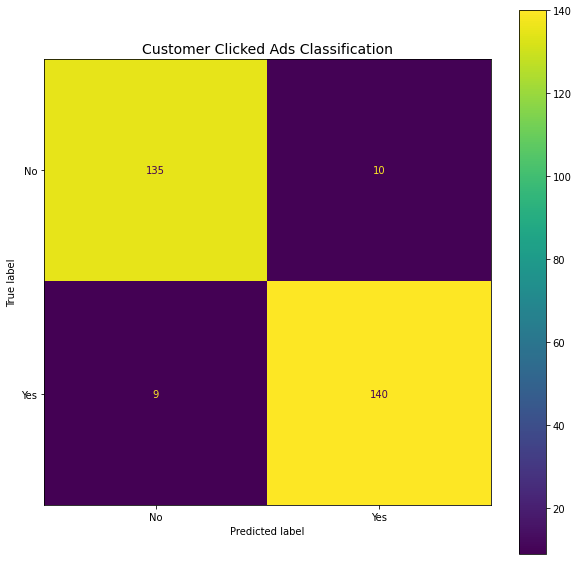

In [73]:
cm = confusion_matrix(y_test,y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])

fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title('Customer Clicked Ads Classification', fontsize=14)
plt.savefig('Confussion Matrix', dpi = 200)
plt.show()

- Terlihat Model yang dibuat memiliki Type I Error (False Positive = 10) atau Type II Error (False Negative = 9) yang kecil. 
- Karena Nilai Error yang kecil tersebut membuat Model yang dibuat memiliki Accuracy yang tinggi (93,54%) dalam memprediksi Customer yang meng-klik Iklan atau tidak meng-klik Iklan.

### Feature Importance

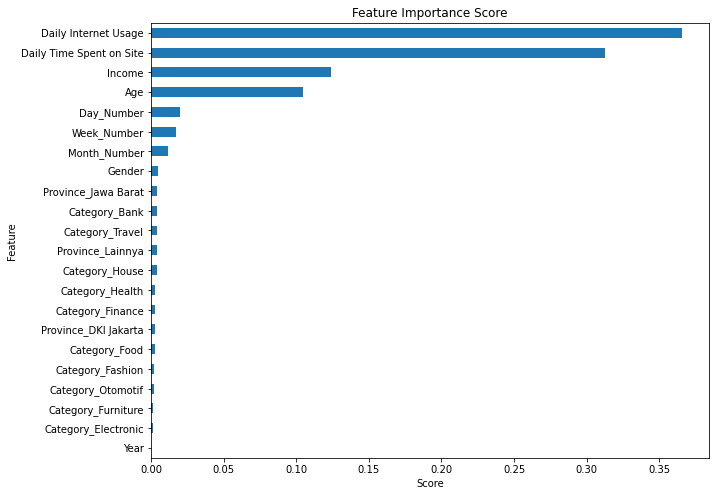

In [74]:
feat_importances = pd.Series(rfn.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10,8))
ax.invert_yaxis()

plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance Score')
plt.savefig('Feature Importance', dpi = 200)

- Untuk Feature Daily Internet Usage dan Daily Time Spent on Site keduanya memiliki Score Importances yang tinggi dibandingkan dengen Feature Lainnya. 
- Kedua Feature tersebut dapat digunakan sebagai Feature Utama dalam menentukan keberhasilan Marketing kedepannya.
- Berdasarkan EDA yang telah dilakukan, Kelompok Customer dengan Daily Internet Usage 100 - 125, Daily Time Spent on Site 30 - 40 dan Umur > 40 Tahun lebih memungkinkan untuk meng-klik Iklan. 
- Kita dapat melakukan analisis lebih lanjut terhadap perilaku kelompok customer tersebut sehingga kita dapat mengoptimasikan campaign yang diberikan kepada kelompok customer tersebut. Dengan melakukan optimasi tersebut diharapkan kita dapat mengurangi kerugian yang diakibatkan cost yang dikeluarkan perusahaan.
- Tim Marketing juga dapat mempertimbangkan Feature Income dan Age sebagai Feature Tambahan dalam menentukan Strategi Marketing kedepannya.
